### Creating and Persisting an ML Model

In [1]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer


# Import Data

In [4]:
df = pd.read_csv('data/student-mat.csv', sep=';')
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Quick Peek at Data

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

No missing data! Yay. 

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Attributes for student-mat.csv
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)  
2 sex - student's sex (binary: "F" - female or "M" - male)  
3 age - student's age (numeric: from 15 to 22)  
4 address - student's home address type (binary: "U" - urban or "R" - rural)  
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)  
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)  
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")  
12 guardian - student's guardian (nominal: "mother", "father" or "other")  
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
16 schoolsup - extra educational support (binary: yes or no)  
17 famsup - family educational support (binary: yes or no)  
18 paid - extra paid classes within the course subject (binary: yes or no)  
19 activities - extra-curricular activities (binary: yes or no)  
20 nursery - attended nursery school (binary: yes or no)  
21 higher - wants to take higher education (binary: yes or no)  
22 internet - Internet access at home (binary: yes or no)  
23 romantic - with a romantic relationship (binary: yes or no)  
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 health - current health status (numeric: from 1 - very bad to 5 - very good)  
30 absences - number of school absences (numeric: from 0 to 93)  
  
# Grades 
31 G1 - first period grade (numeric: from 0 to 20)  
31 G2 - second period grade (numeric: from 0 to 20)  
32 G3 - final grade (numeric: from 0 to 20, output target)  

# Create Label

In [8]:
# set label based on spec
df['qual_student'] = np.where(df['G3']>=15, 1, 0)

In [9]:
df['qual_student'].describe()

count    395.000000
mean       0.184810
std        0.388636
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: qual_student, dtype: float64

<AxesSubplot:xlabel='qual_student', ylabel='Density'>

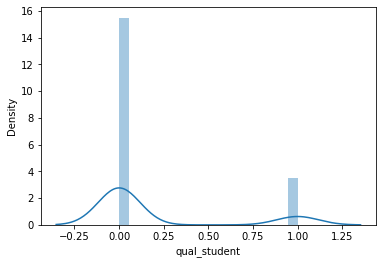

In [10]:
# histogram
sns.distplot(df['qual_student'])

- we note that the qual_student takes on values in the set {0, 1} --> binary classification problem

# Label - EDA

Target Variable
qual_student
0    322
1     73
Name: qual_student, dtype: int64


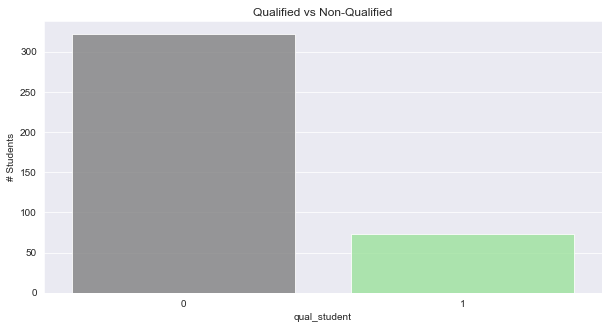

In [11]:
# Survival Count
print('Target Variable')
print(df.groupby(['qual_student']).qual_student.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['qual_student'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Qualified vs Non-Qualified')
plt.ylabel('# Students')
plt.show()

The majority of students are unqualified as per our definition here. 

aha! we can see we have quite a class imbalance here:  
~81.5% unqualified students  
~18.5% qualified students

<AxesSubplot:ylabel='qual_student'>

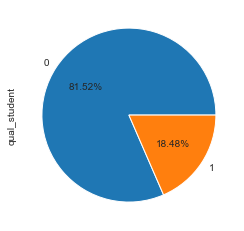

In [12]:
df['qual_student'].value_counts().plot.pie(autopct='%1.2f%%')

# Numeric Variables

In [13]:
df.groupby('age')['age'].count()

age
15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

In [14]:
# Identify numeric features
# print('Continuous Variables')
# print(train_data[['Age','Fare']].describe().transpose())
# print('--'*40)
print('Discrete Variables')


discrete_vars = [['age', 'Medu', 'Fedu', 
              'traveltime', 'failures', 'famrel', 
              'freetime', 'goout', 'Dalc', 'Walc', 
              'health', 'absences']]

for var in discrete_vars[0]:
    print(df.groupby(var)[var].count())
    print()
# print(train_data.groupby('Pclass').Pclass.count())
# print(train_data.groupby('SibSp').SibSp.count())
# print(train_data.groupby('Parch').Parch.count())

# Subplots of Numeric Features
# sns.set_style('darkgrid')
# fig = plt.figure(figsize = (20,16))
# fig.subplots_adjust(hspace = .30)

# ax1 = fig.add_subplot(321)
# ax1.hist(train_data['Pclass'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
# ax1.set_xlabel('Pclass', fontsize = 15)
# ax1.set_ylabel('# Passengers',fontsize = 15)
# ax1.set_title('Passenger Class',fontsize = 15)

# ax2 = fig.add_subplot(323)
# ax2.hist(train_data['Age'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
# ax2.set_xlabel('Age',fontsize = 15)
# ax2.set_ylabel('# Passengers',fontsize = 15)
# ax2.set_title('Age of Passengers',fontsize = 15)

# ax3 = fig.add_subplot(325)
# ax3.hist(train_data['SibSp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
# ax3.set_xlabel('SibSp',fontsize = 15)
# ax3.set_ylabel('# Passengers',fontsize = 15)
# ax3.set_title('Passengers with Spouses or Siblings',fontsize = 15)

# ax4 = fig.add_subplot(222)
# ax4.hist(train_data['Parch'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
# ax4.set_xlabel('Parch',fontsize = 15)
# ax4.set_ylabel('# Passengers',fontsize = 15)
# ax4.set_title('Passengers with Children',fontsize = 15)

# ax5 = fig.add_subplot(224)
# ax5.hist(train_data['Fare'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
# ax5.set_xlabel('Fare',fontsize = 15)
# ax5.set_ylabel('# Passengers',fontsize = 15)
# ax5.set_title('Ticket Fare',fontsize = 15)

# plt.show()

Discrete Variables
age
15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

Medu
0      3
1     59
2    103
3     99
4    131
Name: Medu, dtype: int64

Fedu
0      2
1     82
2    115
3    100
4     96
Name: Fedu, dtype: int64

traveltime
1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64

failures
0    312
1     50
2     17
3     16
Name: failures, dtype: int64

famrel
1      8
2     18
3     68
4    195
5    106
Name: famrel, dtype: int64

freetime
1     19
2     64
3    157
4    115
5     40
Name: freetime, dtype: int64

goout
1     23
2    103
3    130
4     86
5     53
Name: goout, dtype: int64

Dalc
1    276
2     75
3     26
4      9
5      9
Name: Dalc, dtype: int64

Walc
1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64

health
1     47
2     45
3     91
4     66
5    146
Name: health, dtype: int64

absences
0     115
1       3
2      65
3       8
4      53
5       5
6      31
7       7
8  

# Previous Model

In [15]:
df2 = df.copy()

In [16]:
include = ['health', 'absences','age','G3']
df2.drop(columns=df2.columns.difference(include), inplace=True)  # only using 3 features

In [17]:
df2['qual_student'] = np.where(df2['G3']>=15, 1, 0)

In [18]:
df2

,age,health,absences,G3,qual_student
0,18,3,6,6,0
1,17,3,4,6,0
2,15,3,10,10,0
3,15,5,2,15,1
4,16,5,4,10,0
...,...,...,...,...,...
390,20,4,11,9,0
391,17,2,3,16,1
392,21,3,3,7,0
393,18,5,0,10,0


In [19]:
include = ['G3']
df2.drop(columns=include, inplace=True)

In [20]:
df2

,age,health,absences,qual_student
0,18,3,6,0
1,17,3,4,0
2,15,3,10,0
3,15,5,2,1
4,16,5,4,0
...,...,...,...,...
390,20,4,11,0
391,17,2,3,1
392,21,3,3,0
393,18,5,0,0


In [21]:
df2.columns

Index(['age', 'health', 'absences', 'qual_student'], dtype='object')

In [22]:
from sklearn.ensemble import RandomForestClassifier as rf
import sklearn
dependent_variable = 'qual_student'
x = df2[df2.columns.difference([dependent_variable])]
y = df2[dependent_variable]
clf = rf(n_estimators = 1000)
clf.fit(x, y)

RandomForestClassifier(n_estimators=1000)

In [23]:
pred = clf.predict(x)
sklearn.metrics.f1_score(y, pred, average='binary')

0.5357142857142857

Hmm, this seems like it sucks. Let's evaluate this model a bit more.

In [24]:
# Additional Scoring

# Score It
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Random Forest')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y, pred))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y, pred))

# Accuracy
print('--'*40)
model_accuracy = round(accuracy_score(y, pred) * 100,2)
print('Accuracy', model_accuracy,'%')

Random Forest


Confusion Matrix
[[313   9]
 [ 43  30]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       322
           1       0.77      0.41      0.54        73

    accuracy                           0.87       395
   macro avg       0.82      0.69      0.73       395
weighted avg       0.86      0.87      0.85       395

--------------------------------------------------------------------------------
Accuracy 86.84 %


In [25]:
random_state = 42
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

#separate dataset into X_train and Y_train:
def separate(X_train):
    X = X_train.drop(columns= ['qual_student'])
    Y = X_train['qual_student']
    return X, Y

X_encoded, Y_encoded = separate(df2)

In [26]:
classifiers = [ ]
classifiers.append(('RandomForest', RandomForestClassifier(random_state=random_state)))

In [27]:
def getScores(estimator, x, y):
    yPred = estimator.predict(x)
    return (accuracy_score(y, yPred), 
            precision_score(y, yPred, pos_label=3, average='macro'), 
            recall_score(y, yPred, pos_label=3, average='macro'),
            f1_score(y, yPred, pos_label=3, average='macro'))

def my_scorer(estimator, x, y):
    a, p, r, f = getScores(estimator, x, y)
    print('accuracy:', a)
    print('precision:', p)
    print('recall:', r)
    
    print('f1 score:', f)
    print()
#     return (a, p, r)
    return a+p+r

In [28]:
# evaluate each model 
results = []
names = []

for name, classifier in classifiers:
    kfold = model_selection.KFold(n_splits= 3, random_state=random_state, shuffle = True)
#     cv_results = model_selection.cross_val_score(clf, X_encoded, y = Y_encoded, cv=kfold, scoring='accuracy')
    cv_results = model_selection.cross_val_score(clf, X_encoded, y = Y_encoded, cv=kfold, scoring=my_scorer)
#     print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

accuracy: 0.7878787878787878
precision: 0.6208333333333333
recall: 0.5631349782293179
f1 score: 0.5696320447135538

accuracy: 0.7878787878787878
precision: 0.48342857142857143
recall: 0.4942161946549661
f1 score: 0.4735042735042735

accuracy: 0.7938931297709924
precision: 0.554147465437788
recall: 0.5183021806853583
f1 score: 0.5060745705906996

RandomForest: 1.867904 (0.084238)


Using the same dataset, 

# Categorical Feature Encoding 

# Random Forest with All Features (encoded)

In [29]:
# Identify categorical variables
cat_cols = df.select_dtypes(['object']).columns

In [30]:
# encode variables into numeric labels
le = sklearn.preprocessing.LabelEncoder()

# columns = ['Sex', 'Embarked', 'ticket_type', 'cabin_type', 'title']

for col in cat_cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,qual_student
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,0
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,0


In [31]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

In [32]:
so = so[::-1] # flip it so it's descending
so = so[34:] # 

In [33]:
so.head(n = 10)

G3            G2              0.904868
G2            G3              0.904868
G1            G2              0.852118
G2            G1              0.852118
G1            G3              0.801468
G3            G1              0.801468
qual_student  G1              0.666321
G1            qual_student    0.666321
qual_student  G2              0.652609
G2            qual_student    0.652609
dtype: float64

We see that {G1, G2, G3} are all pretty great predictors of each other. They're all highly correlated. This isn't surprising, given that we might expect that students who perform well in the first quarter generally continue to perform well in the 2nd and 3rd quarters, and vice-versa for every combination thereof. 

Further, we see that {G1, G2, G3} are all pretty great predictors of qual_student. Again, not surprising since we defined `qual_student` as `G3 >= 15`.

Crucially, we note the following:

G1 and G2 seem to be features that are part of the dataset. But note the problem here: we’re trying to predict potential applicant success.  And applicant success is measured by grades: {G1, G2, G3} in our dataset. Further, our labels (ground truth) are calculated on the basis of one of these grades: G3.
Putting this into context, I don’t think it would make sense at all in the real world to know any grades {G1, G2, G3} since we haven’t admitted the applicant yet.

**In summary: I believe we should not use G1, G2, or G3 as predictors.**

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

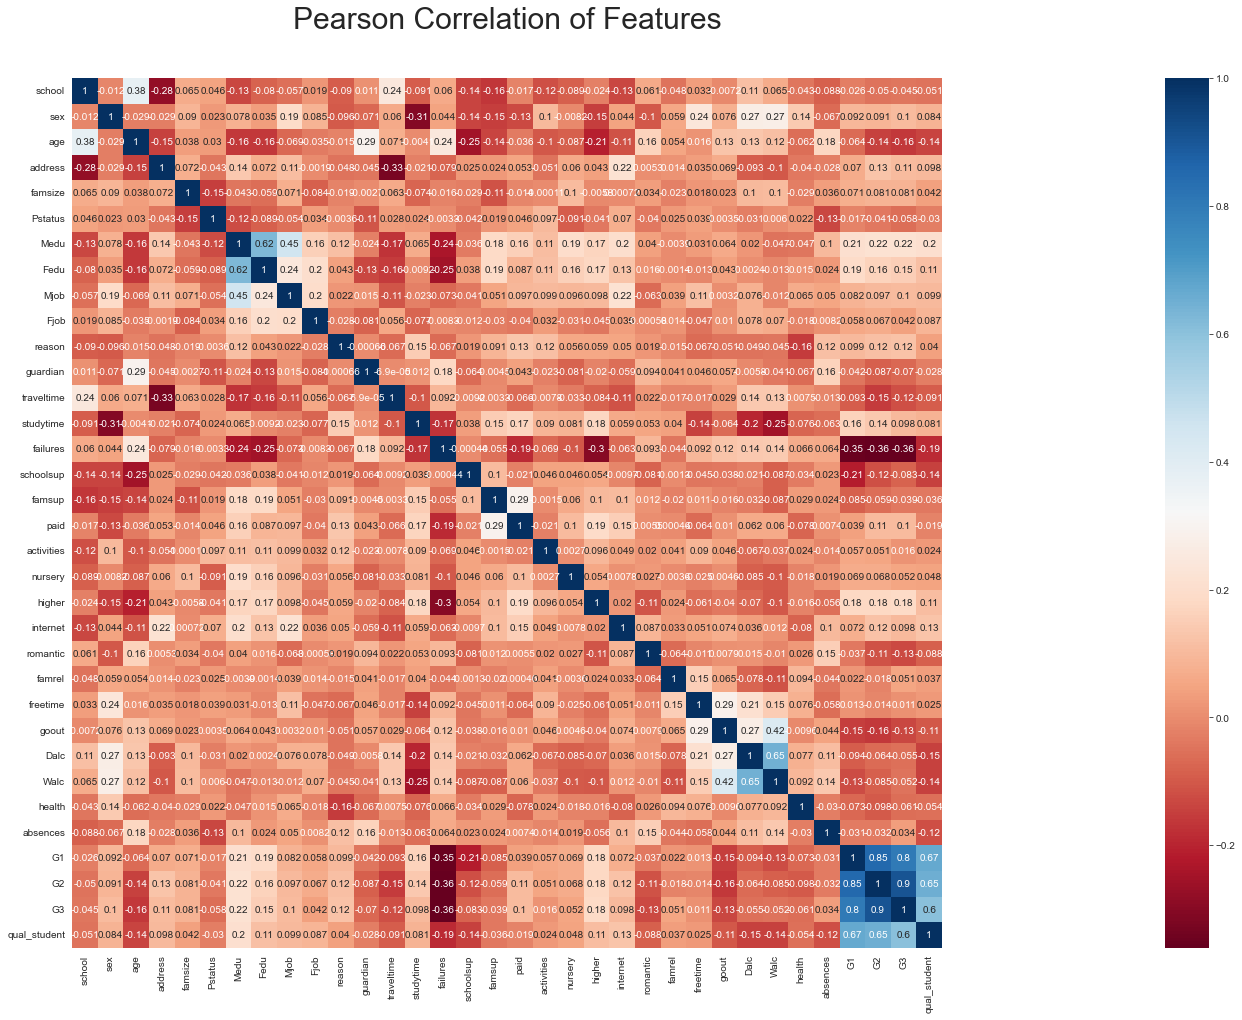

In [34]:
colormap = plt.cm.RdBu
plt.figure(figsize=(80,16))
plt.title('Pearson Correlation of Features', y=1.05, size=30)
sns.heatmap(df.corr(),linewidths=0.001,vmax=1.0, 
            square=True,linecolor='white',cmap=colormap, annot=True)

In [35]:
from sklearn import model_selection

In [36]:
# df.drop(columns=['G1', 'G2', 'G3'])

In [37]:
random_state = 42
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

#separate dataset into X_train and Y_train:
def separate(X_train):
    X = X_train.drop(columns= ['qual_student'])
    Y = X_train['qual_student']
    return X, Y

X_encoded, Y_encoded = separate(df)

In [38]:
# Modeling step Test differents algorithms 
random_state = 42
classifiers = []

classifiers.append(('SVC', make_pipeline(StandardScaler(),SVC(random_state=random_state))))
classifiers.append(('DecisionTree', DecisionTreeClassifier(random_state=random_state)))
classifiers.append(('AdaBoost', AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),\
                                                  random_state=random_state,learning_rate=0.1)))
classifiers.append(('RandomForest', RandomForestClassifier(random_state=random_state)))
classifiers.append(('GradientBoost', GradientBoostingClassifier(random_state=random_state)))
classifiers.append(('MLP', make_pipeline(StandardScaler(), MLPClassifier(random_state=random_state))))
classifiers.append(('KNN',make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=7))))

# evaluate each model 
results = []
names = []
for name, classifier in classifiers:
    kfold = model_selection.KFold(n_splits= 3, random_state=random_state, shuffle = True)
    cv_results = model_selection.cross_val_score(classifier, X_encoded, y = Y_encoded, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVC: 0.921505 (0.007297)
DecisionTree: 1.000000 (0.000000)
AdaBoost: 1.000000 (0.000000)
RandomForest: 1.000000 (0.000000)
GradientBoost: 1.000000 (0.000000)
MLP: 0.939240 (0.012373)
KNN: 0.842972 (0.030900)


Hmm, many of our models got 100% accuracy WITH stratified cross validation? Seems a bit too good to be true.  
Let's get rid of top 3 most corrrelated variables -- G1, G2, and G3 -- and try again.

In [39]:
df_dropped_Gs = df.drop(columns=['G1', 'G2', 'G3'])

In [40]:
random_state = 42
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

#separate dataset into X_train and Y_train:
def separate(X_train):
    X = X_train.drop(columns= ['qual_student'])
    Y = X_train['qual_student']
    return X, Y

X_encoded, Y_encoded = separate(df_dropped_Gs)

In [41]:
# Modeling step Test differents algorithms 
random_state = 42
classifiers = []

classifiers.append(('SVC', make_pipeline(StandardScaler(),SVC(random_state=random_state))))
classifiers.append(('DecisionTree', DecisionTreeClassifier(random_state=random_state)))
classifiers.append(('AdaBoost', AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),\
                                                  random_state=random_state,learning_rate=0.1)))
classifiers.append(('RandomForest', RandomForestClassifier(random_state=random_state)))
classifiers.append(('GradientBoost', GradientBoostingClassifier(random_state=random_state)))
classifiers.append(('MLP', make_pipeline(StandardScaler(), MLPClassifier(random_state=random_state))))
classifiers.append(('KNN',make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=7))))

# evaluate each model 
results = []
names = []
for name, classifier in classifiers:
    kfold = model_selection.KFold(n_splits= 3, random_state=random_state, shuffle = True)
#     cv_results = model_selection.cross_val_score(classifier, X_encoded, y = Y_encoded, cv=kfold, scoring='accuracy')
    cv_results = model_selection.cross_val_score(classifier, X_encoded, y = Y_encoded, cv=kfold, scoring=my_scorer)
    print('cv_results', cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print()

accuracy: 0.803030303030303
precision: 0.4015151515151515
recall: 0.5
f1 score: 0.4453781512605042

accuracy: 0.8257575757575758
precision: 0.4128787878787879
recall: 0.5
f1 score: 0.4522821576763486

accuracy: 0.8091603053435115
precision: 0.4076923076923077
recall: 0.4953271028037383
f1 score: 0.44725738396624465

cv_results [1.70454545 1.73863636 1.71217972]
SVC: 1.718454 (0.014608)

accuracy: 0.7196969696969697
precision: 0.5624338624338625
recall: 0.5642235123367199
f1 score: 0.5632656711079317

accuracy: 0.7045454545454546
precision: 0.5254120879120879
recall: 0.5295173514160351
f1 score: 0.5260977630488815

accuracy: 0.732824427480916
precision: 0.5326839826839826
recall: 0.5294003115264797
f1 score: 0.5304659498207887

cv_results [1.84635434 1.75947489 1.79490872]
DecisionTree: 1.800246 (0.035669)

accuracy: 0.7196969696969697
precision: 0.551214953271028
recall: 0.5497097242380261
f1 score: 0.5504004418668877

accuracy: 0.6666666666666666
precision: 0.4767325075326414
recall: 

# Conclusion

Changes:
    - We have dropped {G1, G2, G3} from the dataset

Old Model (Random Forest) vs New Model (Random Forest):

---
    
Old Model: 
        
accuracy: 0.7803030303030303  
precision: 0.6040723981900452  
recall: 0.5584179970972424 
f1 score: 0.5696320447135538

accuracy: 0.7878787878787878  
precision: 0.48342857142857143  
recall: 0.4942161946549661  
f1 score: 0.4735042735042735  

accuracy: 0.8015267175572519  
precision: 0.6021341463414633  
recall: 0.5391355140186915  
f1 score: 0.5060745705906996  

RandomForest: 1.883704 (0.083567)
    
---
    
New Model:
    
accuracy: 0.8106060606060606  
precision: 0.9045801526717557  
recall: 0.5192307692307693  
f1 score: 0.48429442100328174  

accuracy: 0.8333333333333334  
precision: 0.916030534351145  
recall: 0.5217391304347826  
f1 score: 0.4958333333333334  

accuracy: 0.8091603053435115  
precision: 0.5768229166666666  
recall: 0.51148753894081  
f1 score: 0.4838455476753349  

cv_results [2.23441698 2.271103   1.89747076]  
RandomForest: 2.134330 (0.168153)

---


# Export model for deployment

In [47]:
import joblib
# modify the file path to where you want to save the model
joblib.dump(clf, 'dockerfile/apps/hammer_model.pkl')

['dockerfile/apps/hammer_model.pkl']

In [48]:
query_df = pd.DataFrame({ 'age' : pd.Series(1) ,'health' : pd.Series(15) ,'absences' : pd.Series(10)})

In [49]:
pred = clf.predict(query_df)


In [53]:
pred

array([0])

In [52]:
pred[0]

0

# Todo/Extensions

Urgent (rest of 4b):
- solidify conclusion
- finish readme
- api documentation
- deployment instructions
- exlpanation & justification of testing


Nice to have (for modeling):
- more EDA 
- more feature engineering
- hyperparameter tuning (gridsearchCV?)
- improve model :) 

# Dump

In [42]:
# encoded_cat_vars = pd.concat(encoded_cat_vars, axis = 1)

In [43]:
# encoded_cat_vars

In [44]:
# Summary of the data

# df.describe()

# df.info

# Create a subset of features as an example.

# # include = ['health', 'absences','age','G3']
# # df.drop(columns=df.columns.difference(include), inplace=True)  # only using 3 features

# The goal is to predict the quality of the student. We will build a predictor based on the final grade (G3).
# Becasue we are trying to find quality students. In this model we define a quality student as one who achieves a final grade of 15 or higher. 

# df['qual_student'] = np.where(df['G3']>=15, 1, 0)

# df.describe()

# Drop the G3 score

# # include = ['health', 'absences','age','qual_student']
# # df.drop(columns=df.columns.difference(include), inplace=True) 

# Import scikit-learn and build a random forest classifer

# df.columns

# features = [x for x in df.columns if x != 'qual_student']

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.impute import SimpleImputer
# # imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# # data = pd.read_csv('../input/train.csv')
# # data.dropna(axis=0, subset=['SalePrice'], inplace=True)

# y = df.qual_student
# X = df.drop(['qual_student'], axis=1).select_dtypes(exclude=['object'])
# train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

# my_imputer = SimpleImputer()
# train_X = my_imputer.fit_transform(train_X)
# test_X = my_imputer.transform(test_X)


# from xgboost import XGBRegressor

# my_model = XGBRegressor()
# # Add silent=True to avoid printing out updates with each cycle
# my_model.fit(train_X, train_y, verbose=False)

# from sklearn.ensemble import RandomForestClassifier as rf
# import sklearn
# # dependent_variable = 'qual_student'
# # # x = df[df.columns.difference([dependent_variable])]
# # # x = df.drop([dependent_variable], axis=1).select_dtypes(exclude=['object'])
# # y = df[dependent_variable]
# clf = rf(n_estimators = 1000)
# clf.fit(train_X, train_y)

# pred = clf.predict(test_X)
# sklearn.metrics.f1_score(test_y, pred, average='binary')

# It's not very good! We didn't even cross validate. You'll need to do better :)
# Let's export this model so we can use it in a microservice (flask api)

# from xgboost import cv

# params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                 'max_depth': 5, 'alpha': 10}

# xgb_cv = cv(dtrain=data_dmatrixn_X, params=params, nfold=3,
#                     num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)



# import joblib
# # modify the file path to where you want to save the model
# joblib.dump(clf, 'home/matrix/dockerfile/apps/model.pkl')

# query_df = pd.DataFrame({ 'age' : pd.Series(1) ,'health' : pd.Series(15) ,'absences' : pd.Series(10)})

# pred = clf.predict(query_df)

# x

# type(x)